In [1]:
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 20
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
with open("./data.json", "r") as f:
    data = json.load(f)

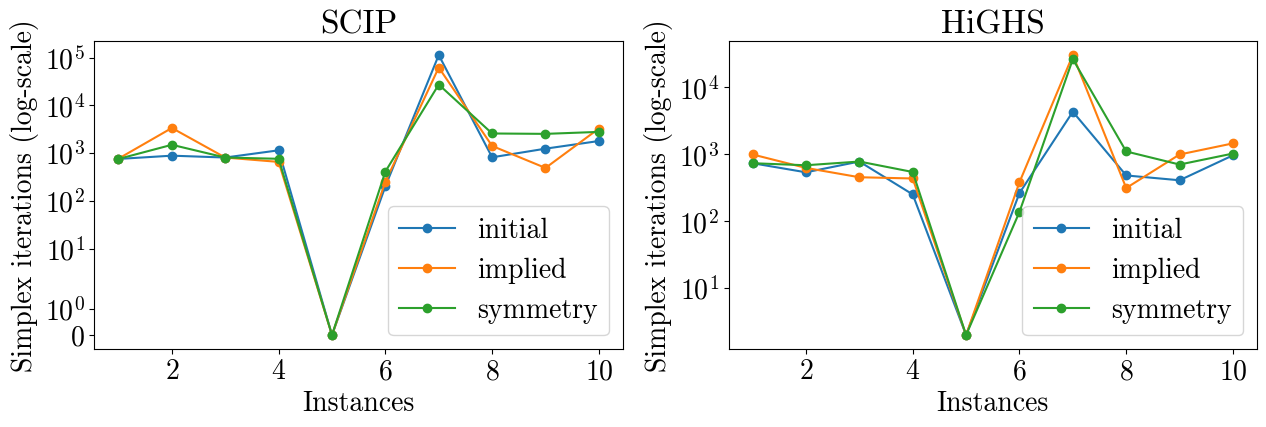

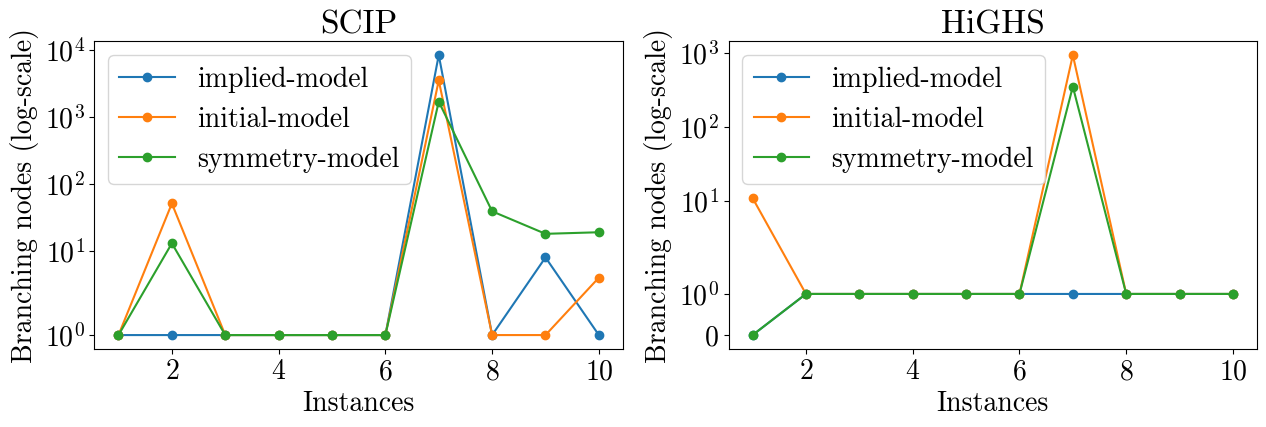

In [3]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(range(1,11), data["iterations_initial_model_scip"], marker='o', linestyle='-', label="initial")
plt.plot(range(1,11), data["iterations_implied_model_scip"], marker='o', linestyle='-', label="implied")
plt.plot(range(1,11), data["iterations_symmetry_model_scip"], marker='o', linestyle='-', label="symmetry")
plt.title('SCIP')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Simplex iterations (log-scale)')
plt.yscale("symlog")
plt.subplot(1,2,2)
plt.plot(range(1,11), data["iterations_initial_model_highs"], marker='o', linestyle='-', label="initial")
plt.plot(range(1,11), data["iterations_implied_model_highs"], marker='o', linestyle='-', label="implied")
plt.plot(range(1,11), data["iterations_symmetry_model_highs"], marker='o', linestyle='-', label="symmetry")
plt.title('HiGHS')
plt.legend()
plt.xlabel('Instances')
plt.ylabel('Simplex iterations (log-scale)')
plt.yscale("symlog")
plt.savefig(f"simplex.pdf", bbox_inches="tight")


plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(range(1,11), data["nodes_initial_model_scip"], marker='o', linestyle='-', label="initial")
plt.plot(range(1,11), data["nodes_implied_model_scip"], marker='o', linestyle='-', label="implied")
plt.plot(range(1,11), data["nodes_symmetry_model_scip"], marker='o', linestyle='-', label="symmetry")
plt.title('SCIP')
plt.legend(['implied-model', 'initial-model', 'symmetry-model'])
plt.xlabel('Instances')
plt.ylabel('Branching nodes (log-scale)')
plt.yscale("symlog")
plt.subplot(1,2,2)
plt.plot(range(1,11), data["nodes_initial_model_highs"], marker='o', linestyle='-', label="initial")
plt.plot(range(1,11), data["nodes_implied_model_highs"], marker='o', linestyle='-', label="implied")
plt.plot(range(1,11), data["nodes_symmetry_model_highs"], marker='o', linestyle='-', label="symmetry")
plt.title('HiGHS')
plt.legend(['implied-model', 'initial-model', 'symmetry-model'])
plt.xlabel('Instances')
plt.ylabel('Branching nodes (log-scale)')
plt.yscale("symlog")
plt.savefig(f"branching.pdf", bbox_inches="tight")

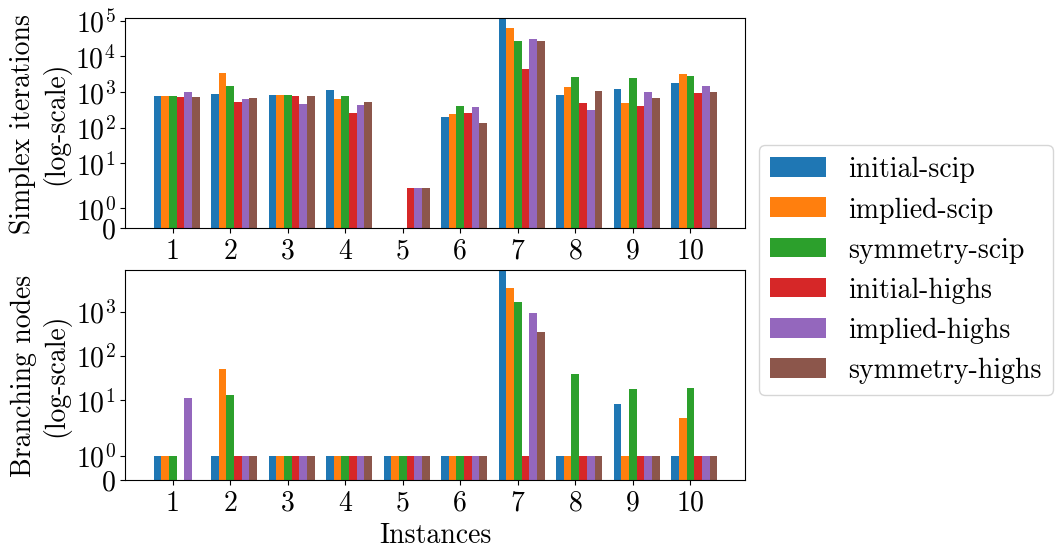

In [4]:
width = 0.4

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.bar([3*x-(width*2)-width/2 for x in range(1,11)], data["iterations_initial_model_scip"], width=width, label="initial-scip", align='edge')
plt.bar([3*x-(width)-width/2 for x in range(1,11)], data["iterations_implied_model_scip"], width=width, label="implied-scip", align='edge')
plt.bar([3*x-width/2 for x in range(1,11)], data["iterations_symmetry_model_scip"], width=width, label="symmetry-scip", align='edge')
plt.bar([3*x+(width)-width/2 for x in range(1,11)], data["iterations_initial_model_highs"], width=width, label="initial-highs", align='edge')
plt.bar([3*x+(width*2)-width/2 for x in range(1,11)], data["iterations_implied_model_highs"], width=width, label="implied-highs", align='edge')
plt.bar([3*x+(width*3)-width/2 for x in range(1,11)], data["iterations_symmetry_model_highs"], width=width, label="symmetry-highs", align='edge')
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# plt.xlabel('Instances')
plt.xticks([x*3 for x in range(1, 11)], range(1, 11))
plt.ylabel('Simplex iterations\n(log-scale)')
plt.yscale("symlog")
# plt.savefig(f"simplex.pdf", bbox_inches="tight")
# plt.show()

# plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.bar([3*x-(width*2)-width/2 for x in range(1,11)], data["nodes_initial_model_scip"], width=width, label="initial-scip", align='edge')
plt.bar([3*x-(width)-width/2 for x in range(1,11)], data["nodes_implied_model_scip"], width=width, label="implied-scip", align='edge')
plt.bar([3*x-width/2 for x in range(1,11)], data["nodes_symmetry_model_scip"], width=width, label="symmetry-scip", align='edge')
plt.bar([3*x+(width)-width/2 for x in range(1,11)], data["nodes_initial_model_highs"], width=width, label="initial-highs", align='edge')
plt.bar([3*x+(width*2)-width/2 for x in range(1,11)], data["nodes_implied_model_highs"], width=width, label="implied-highs", align='edge')
plt.bar([3*x+(width*3)-width/2 for x in range(1,11)], data["nodes_symmetry_model_highs"], width=width, label="symmetry-highs", align='edge')
plt.legend(loc="center left", bbox_to_anchor=(1, 1))
plt.xlabel('Instances')
plt.xticks([x*3 for x in range(1, 11)], range(1, 11))
plt.ylabel('Branching nodes\n(log-scale)')
plt.yscale("symlog")
plt.savefig(f"simplex.pdf", bbox_inches="tight")

In [5]:
results = {}

for i in range(1, 11):
    with open(f"../../res/MIP/{i}.json", "r") as f:
        results[i] = json.load(f)

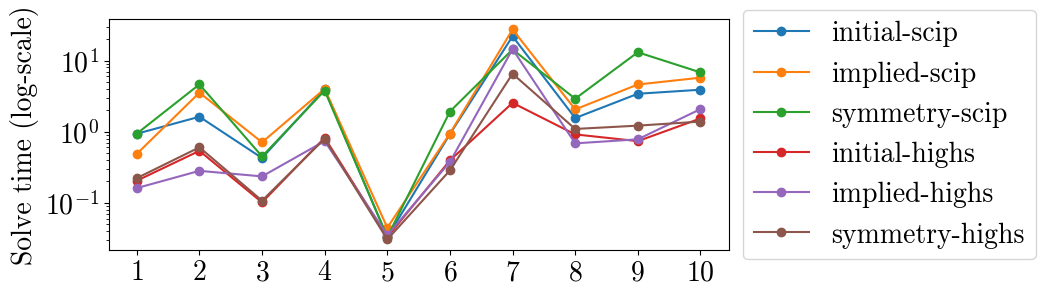

In [9]:
plt.figure(figsize=(8, 3))

plt.plot(range(1, 11), [results[i]["initial-model_scip"]["__solve_time"] for i in range(1, 11)], label="initial-scip", marker="o")
plt.plot(range(1, 11), [results[i]["implied-model_scip"]["__solve_time"] for i in range(1, 11)], label="implied-scip", marker="o")
plt.plot(range(1, 11), [results[i]["symmetry-model_scip"]["__solve_time"] for i in range(1, 11)], label="symmetry-scip", marker="o")
plt.plot(range(1, 11), [results[i]["initial-model_highs"]["__solve_time"] for i in range(1, 11)], label="initial-highs", marker="o")
plt.plot(range(1, 11), [results[i]["implied-model_highs"]["__solve_time"] for i in range(1, 11)], label="implied-highs", marker="o")
plt.plot(range(1, 11), [results[i]["symmetry-model_highs"]["__solve_time"] for i in range(1, 11)], label="symmetry-highs", marker="o")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# plt.xlabel('Instances')
plt.xticks(range(1, 11))
plt.ylabel('Solve time (log-scale)')
plt.yscale("log")
plt.savefig(f"time.pdf", bbox_inches="tight")
